Biden Stance Distribution:
biden_stance
NONE       336
FAVOR       67
AGAINST     27
Name: count, dtype: int64

Trump Stance Distribution:
trump_stance
AGAINST    238
FAVOR      126
NONE        66
Name: count, dtype: int64


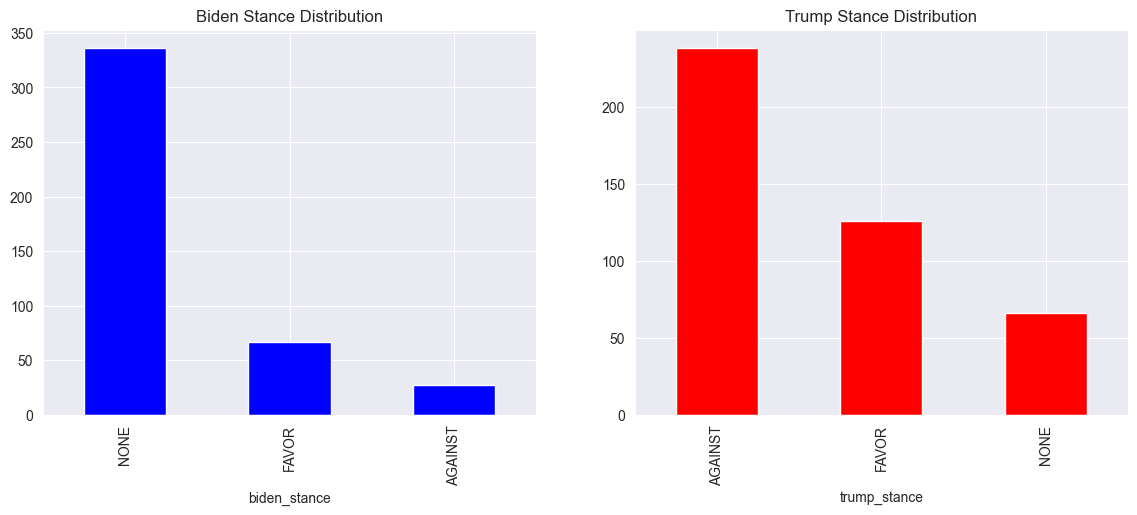

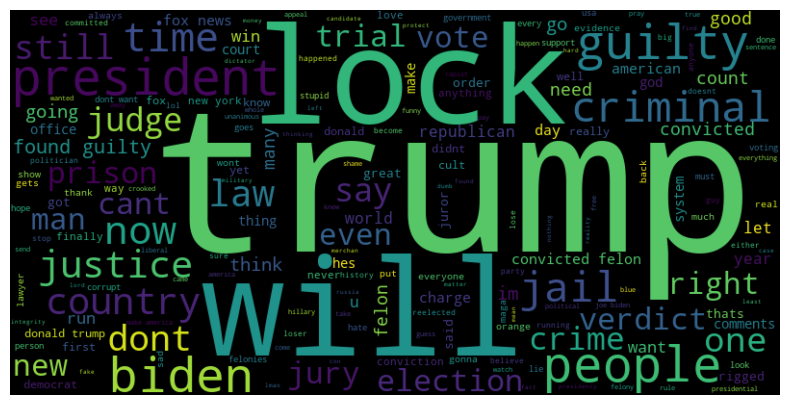


Correlation between Biden and Trump stances:
              biden_stance  trump_stance
biden_stance      1.000000      0.048408
trump_stance      0.048408      1.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load the data
data = pd.read_csv("../comments/trump_guilty/Fox News-Trump found guilty on all 34 counts_cleaned_classified_comments.csv")

# Basic data cleaning
data.fillna("NONE", inplace=True)  # Replace missing values with 'NONE'

# Analysis of stance distribution
biden_stance_count = data['biden_stance'].value_counts()
trump_stance_count = data['trump_stance'].value_counts()

# Display stance distribution
print("Biden Stance Distribution:")
print(biden_stance_count)
print("\nTrump Stance Distribution:")
print(trump_stance_count)

# Create bar charts for visual comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
biden_stance_count.plot(kind='bar', ax=axs[0], title="Biden Stance Distribution", color='blue')
trump_stance_count.plot(kind='bar', ax=axs[1], title="Trump Stance Distribution", color='red')
plt.show()

# Text analysis - creating a word cloud for comments
text = " ".join(comment for comment in data.comment)
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Check if there's any correlation between stances towards Biden and Trump
correlation = data[['biden_stance', 'trump_stance']].apply(lambda x: pd.factorize(x)[0]).corr()
print("\nCorrelation between Biden and Trump stances:")
print(correlation)
